# ![.right](https://static1.squarespace.com/static/5d4304e2a2ae96000114b729/t/5d430619bdc79700012170c1/1582323798085/?format=1500w)

# Analyst Assessment by Claire Chu, March 2020
### This document details the data exploration and analysis of data regarding Website Analytics for Clique Brands.

### Quick Navigation Links

- [I. INTRODUCTION](#int)

- [II. DATA EXPLORATION](#exp)

- [III. BUSINESS INTERESTS](#bus)

- [IV. CONCLUSIONS](#con)

<hr>

In [759]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import wordcloud
import re
import seaborn as sns
import matplotlib.pyplot as plt

### <a name="int"></a> I. INTRODUCTION: The dataset reviewed here contained __ columns/rows
---
Data for this assessment is Google Analytics hit (pageview) level data, by date and by article title. <br>
Field descriptions below:<br>
○ Date - year, month, day of hit.<br>
○ Page Title - article title that was viewed by user.<br>
○ Age - age of user that visited the site.<br>
○ Gender - gender of user that visited the site. <br>
○ Source/Medium - the referral source of the hit or the website that the user was on
before visiting whowhatwear.com. <br>
○ Pageviews - a hit of a url on our site that is being tracked by the analytics.js
tracking code. <br>
○ Unique Pageviews - represents the number of sessions during which that page
was viewed one or more times. <br>

In [372]:
#read in dataset
data_file = pd.read_excel('~/Desktop/analyst_assessment_CC/assessment_ds.xls')

In [373]:
#verify data was read in correctly
data_file.head()
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32755 entries, 0 to 32754
Data columns (total 7 columns):
date                32755 non-null int64
Page Title          32755 non-null object
age                 32755 non-null object
gender              32755 non-null object
Source / Medium     32755 non-null object
pageviews           32755 non-null int64
Unique Pageviews    32755 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [374]:
#Convert date column to readable nomenclature
data_file['new_date'] = pd.to_datetime(data_file['date'].astype(str), format='%Y%m%d')
data_file['new_date'].head()
data_file.head()

,date,Page Title,age,gender,Source / Medium,pageviews,Unique Pageviews,new_date
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,35-44,female,m.facebook.com / referral,35541,31670,2019-06-06
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,25-34,female,m.facebook.com / referral,29730,26236,2019-06-06
2,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,35-44,female,m.facebook.com / referral,21249,18923,2019-06-08
3,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,45-54,female,m.facebook.com / referral,18858,16825,2019-06-06
4,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,25-34,female,m.facebook.com / referral,18157,15970,2019-06-08


In [375]:
#look at "Page Title" column and see if we need to manipulate
data_file['Page Title'].tail(25)
#seems like our article title string is getting cut off, expand display
#pd.options.display.max_colwidth = 100

32730              What Causes Hair Damage? The 12 Worst Things You Can Do | Who What Wear UK
32731              21 Affordable Things From Chanel, Gucci, and Louis Vuitton | Who What Wear
32732                             The 28 Most Classic Nail Colors of All Time | Who What Wear
32733                             The Best Miami Summer Trends for Under $100 | Who What Wear
32734                      The East-West Engagement Ring Trend Is on the Rise | Who What Wear
32735                                 7 of the Best Brands for Summer Sandals | Who What Wear
32736          How to Become a Morning Person | The Latest Fitness, Health, and Wellness Tips
32737                       The 9 Most Daring Celebrity Bikini Trends of 2019 | Who What Wear
32738    The Best Morning Routine for Success | The Latest Fitness, Health, and Wellness Tips
32739                    5 Comfortable Workout Outfits That Are so Flattering | Who What Wear
32740                       Life Lessons Podcast Episode Wit

In [376]:
#seems like our page title includes some different websites including "who what wear", "who what wear UK", etc...
#let's split this column so we can look at analysis by website, if necessary
new = data_file['Page Title'].str.split("|", n = 1, expand = True) 
#verify column was split correctly
new.tail(25)

,0,1
32730,What Causes Hair Damage? The 12 Worst Things You Can Do,Who What Wear UK
32731,"21 Affordable Things From Chanel, Gucci, and Louis Vuitton",Who What Wear
32732,The 28 Most Classic Nail Colors of All Time,Who What Wear
32733,The Best Miami Summer Trends for Under $100,Who What Wear
32734,The East-West Engagement Ring Trend Is on the Rise,Who What Wear
32735,7 of the Best Brands for Summer Sandals,Who What Wear
32736,How to Become a Morning Person,"The Latest Fitness, Health, and Wellness Tips"
32737,The 9 Most Daring Celebrity Bikini Trends of 2019,Who What Wear
32738,The Best Morning Routine for Success,"The Latest Fitness, Health, and Wellness Tips"
32739,5 Comfortable Workout Outfits That Are so Flattering,Who What Wear


In [377]:
#move new split columns into "data_file"
data_file['Page_Title'] = new[0]
data_file['Site'] = new [1]
data_file.head()

,date,Page Title,age,gender,Source / Medium,pageviews,Unique Pageviews,new_date,Page_Title,Site
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,35-44,female,m.facebook.com / referral,35541,31670,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,25-34,female,m.facebook.com / referral,29730,26236,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear
2,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,35-44,female,m.facebook.com / referral,21249,18923,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear
3,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,45-54,female,m.facebook.com / referral,18858,16825,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear
4,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear,25-34,female,m.facebook.com / referral,18157,15970,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear


In [378]:
#rearrange data_file to include new columns
data_file = data_file[['date','new_date', 'Page_Title', 'Site', 'age', 'gender', 'Source / Medium' , 'pageviews', 'Unique Pageviews']]
data_file.head()

,date,new_date,Page_Title,Site,age,gender,Source / Medium,pageviews,Unique Pageviews
0,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com / referral,35541,31670
1,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com / referral,29730,26236
2,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com / referral,21249,18923
3,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,45-54,female,m.facebook.com / referral,18858,16825
4,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com / referral,18157,15970


In [379]:
#look at our dataset
data_file.describe(include = 'all')

,date,new_date,Page_Title,Site,age,gender,Source / Medium,pageviews,Unique Pageviews
count,3.275500e+04,32755,32755,32755,32755,32755,32755,32755.000000,32755.000000
unique,NaN,30,1091,5,6,2,75,NaN,NaN
top,NaN,2019-06-24 00:00:00,Celebrity Style and Fashion Trend Coverage,Who What Wear,25-34,female,google / organic,NaN,NaN
freq,NaN,1391,1175,30933,10160,29310,6560,NaN,NaN
first,NaN,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.019062e+07,NaN,NaN,NaN,NaN,NaN,NaN,385.552526,318.538238
std,8.883106e+00,NaN,NaN,NaN,NaN,NaN,NaN,871.837327,738.081530
min,2.019060e+07,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,7.000000
25%,2.019061e+07,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,50.000000


##### Overall Data Summary
We can see that all counts = 32755, implying that every cell has an entry (no empty cells). 

__'new_date'__
Our 'new_date' column has 30 unique days, this makes sense since there are 30 days in the month of June, with June 24 having the most entries. Does this imply one article was popular on this day or were there multiple articles posted this day?

__ 'Page Title' __
This column has 1091 unique entires, meaning, that there are multiple entries with the same article title. We assume this is because they have different sources, as it is not likely that we would repost the same article multiple times.
Our top result is an article titled "Celebrity Style and Fashion Trend Coverage" so we should look into this entry and the different sources

__'Site'__
We can see that there are 5 different sites that these pages are being posted at, with the most frequent entry being "Who What Wear" occuring 30933 times. That's ~94% of the entires! We will keep this in mind moving forward.

__ 'age' __
We can see from the chart that this column consists of 6 age group categories with the most popular being the group aged "25-34" with 10160 entries, consisting of ~31% of the dataset. We will need to take a deeper look and establish the 6 specific categories.

__'gender' __
There are two unique categories for gender, this makes sense. We see the top category is 'female' with 29310 (~90%) entries distingued as female. 32755 - 29310 = 3445, or about 10% categorized as 'male'.

__'Source / Medium'__
There are 75 unique sources with 'google/organic' being the most popular with 6560 entries (~20%) of the dataset.

__'pageviews'__
Our pageviews, defined as "a hit of a url on our site that is being tracked by the analytics.js tracking code", have a total of 32755 entires. This is good because it means all our urls have tracking code. Our hits range from 9 - 35541, more than 50% being under 173, so it seems like we definitely have some underperforming posts, but we will have to get more information to determine what our threshold should be. Let's look at some graphs to see how the data is skewed later.

__'Unique Pageviews' __
This column "represents the number of sessions during which that page was viewed one or more times". It should be noted that while 'pageviews' and 'unique pageviews' are similar in name, they represent two vastly different metrics. 'Pageviews' represents hits for each URL while 'unique pageviews' represents sessions. We know that one user has the ability to generate multiple pageviews (reloads) and sessions (default duration in Google Analytics is 30 minutes). We will need to keep this in mind as we proceed with our analysis.

In [380]:
#Let's move forward with our data_file
#data_file.head(10)
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32755 entries, 0 to 32754
Data columns (total 9 columns):
date                32755 non-null int64
new_date            32755 non-null datetime64[ns]
Page_Title          32755 non-null object
Site                32755 non-null object
age                 32755 non-null object
gender              32755 non-null object
Source / Medium     32755 non-null object
pageviews           32755 non-null int64
Unique Pageviews    32755 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.2+ MB


### <a name="exp"></a> II. LOOK INTO THE DATA
---

- Date Investigation
- Article Title Exploration
- Article Site Exploration
- Age Investigation
- Gender Investigation
- Source/Medium Exploration

### __Date Investigation__

In [381]:
date = pd.crosstab(index=data_file['date'],columns="count") 
#print(date)
print (date.head())
#date.info()
date = date.reset_index()

col_0     count
date           
20190601   1079
20190602   1228
20190603   1235
20190604   1118
20190605   1218


In [382]:
date_sort = date.sort_values(by=['count'], ascending=False)
date_sort.head()
#date_sort.tail()

col_0,date,count
23,20190624,1391
5,20190606,1299
27,20190628,1291
9,20190610,1262
2,20190603,1235


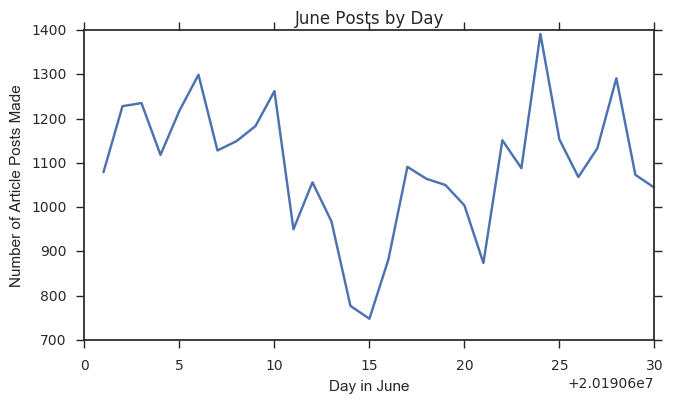

In [383]:
dates = date['date']
posts = date['count']
plt.figure(figsize=(25,4))
plt.subplot(133)
plt.plot(dates, posts)
plt.title('June Posts by Day')
plt.xlabel('Day in June')
plt.ylabel('Number of Posts Made')
plt.show()

#graph confirmed with min and max results

Our graph shows a peak number of posts around June 25 and a pit around June 15. 

### __Article Title Exploration __ 

In [384]:
titles = pd.crosstab(index=data_file['Page_Title'],columns="count") 
titles = titles.reset_index()
titles.head()
#titles.tail()
#By default the data is sorted alphabetically by Page Title

col_0,Page_Title,count
0,'80s Fashion Trends: 35 Iconic Looks From the Eighties,1
1,"10 ""Boring"" Basics Every Woman Needs From Amazon",26
2,"10 ""Boring"" Fashion Basics French Girls Always Have Handy",6
3,10 Affordable Jewelry Brands We Always Shop,31
4,10 Affordable Stores Like Lulu's,30


In [385]:
#Let's instead sort by count. This means the number of times the title occured in our dataset. 
#We can see that there were 1175 instances of "Celebrity Style and Fashion Trend Coverage"
title_sort = titles.sort_values(by=['count'], ascending=False)
title_sort.head()
#title_sort.tail()
#title_sort.info()

col_0,Page_Title,count
466,Celebrity Style and Fashion Trend Coverage,1175
523,How to Become a Morning Person,443
472,Chrissy Teigen Wore the Pleated-Jean Trend,373
997,"These $69 Treggings ""Flatter Every Body Type""",284
584,Jennifer Lopez Wore 2019's Biggest Grandma Trend,280


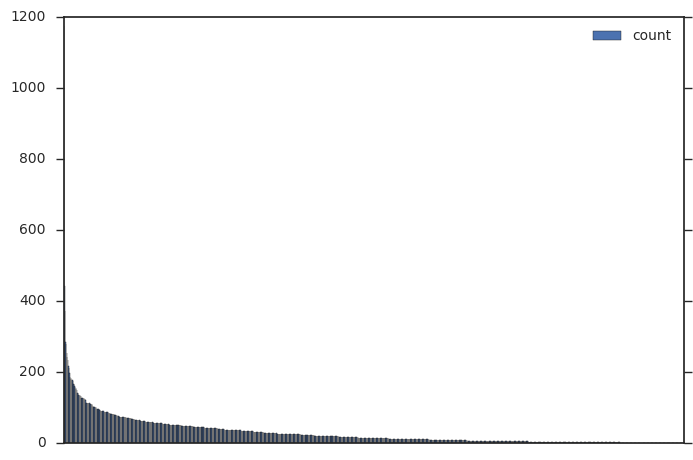

In [644]:
#let's try plotting this to get a sense of what our data looks like
title_plt = pd.DataFrame(title_sort)
ax = title_plt.plot.bar(x='Page_Title', y='count', rot=0)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show(ax)

#we can see that apart from the 1175 instances of "Celebrity Style and Fashion Trend Coverage",
#The next highest article only has 443 instances. 
#let's try treating this as an outlier to get a better sense of the data

In [386]:
#remove the "Celebrity Style and Fashion Trend Coverage" entry
title_sort3 = title_sort.drop([466])
title_sort3.head()

col_0,Page_Title,count
523,How to Become a Morning Person,443
472,Chrissy Teigen Wore the Pleated-Jean Trend,373
997,"These $69 Treggings ""Flatter Every Body Type""",284
584,Jennifer Lopez Wore 2019's Biggest Grandma Trend,280
424,Affordable Summer Fashion Trends From a Chic Houston Blogger,253


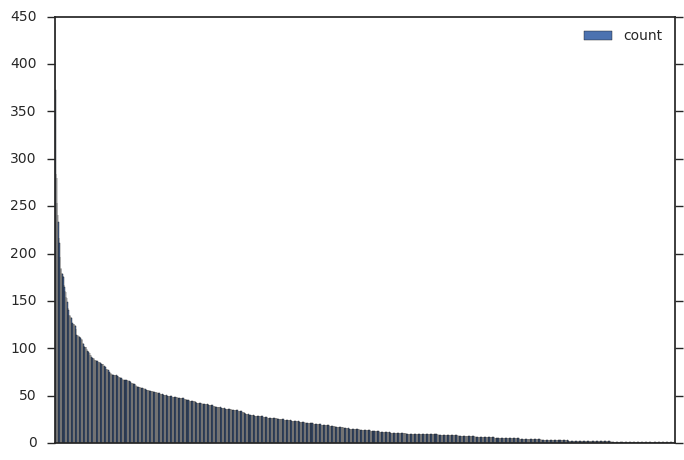

In [643]:
#now plot the same variable, now with entry removed
title_plt2 = pd.DataFrame(title_sort3)
ax2 = title_plt2.plot.bar(x='Page_Title', y='count', rot=0)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show(ax2)

In [167]:
#seems like removing the one outlier didnt really change our data
title_sort.describe()

col_0,count
count,1091.000000
mean,30.022915
std,53.160243
min,1.000000
25%,4.500000
50%,14.000000
75%,40.000000
max,1175.000000


In [168]:
#checking our updated data
#it seems like 75% of our dataset has 40 or less instances. 
#wow our data seems heavily skewed. we'll go back to using the entire dataset.
title_sort3.describe()

col_0,count
count,1090.000000
mean,28.972477
std,40.294795
min,1.000000
25%,4.250000
50%,14.000000
75%,40.000000
max,443.000000


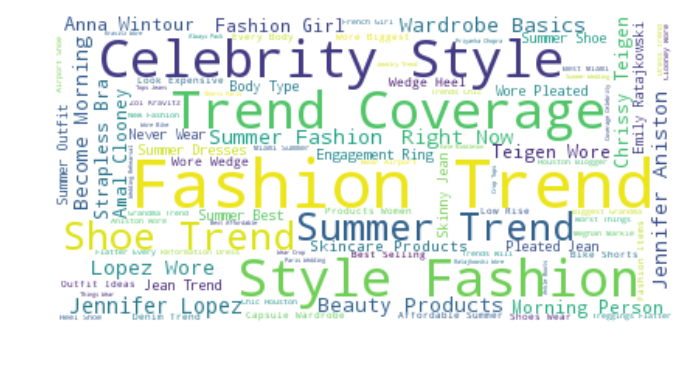

In [172]:
#Let's get some information about the titles being used
#we will use the "page titles" from the original dataset, that way our wordcloud can accurately show word frequencies
#Generate a word cloud
text = " ".join(review for review in data_file.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see from the word cloud that the popular terms are 

    - celebrity style
    - fashion trend
    - trend coverage
    - style fashion
    - summer trend
    - shoe trend

### __Article Site Exploration__

In [387]:
site = pd.crosstab(index=data_file['Site'],columns="count") 
site = site.reset_index()
print (site)
#It seems like from our results, something is happening with some entires having "Who What Wear | Who What Wear"
#We will investigate these entires and see if we can merge them with our "Who What Wear" entry.

col_0                                            Site  count
0       The Latest Fitness, Health, and Wellness Tips    807
1                                           TheThirty    290
2                                       Who What Wear  30933
3                                    Who What Wear UK    615
4                       Who What Wear | Who What Wear    110


In [388]:
#look into entries where we are getting the "Who What Wear | Who What Wear" anomaly

#Search for entries where we have the "Who What Wear | Who What Wear" anomaly
anom = data_file['Site'].str.contains('Who What Wear [|]')
anom.describe()

#Generated a True/False List
#pair down to listing of only true entries
#pull random sample of 10 entires to investigate

anomT = anom[anom]
anomT.head()

##this has been commented out so as not to pull an additional sample at each run
anomTS = anomT.sample(10, random_state=9999)
anomTS

#Checking entries

data_file[27174:27175]
#Outfit Ideas and Everday Fashion Tips
#data_file[30469:30470]
#Shopping Guides to the Latest Fashion Trends
#data_file[30667:30668]
#Outfit Ideas and Everday Fashion Tips
#data_file[26911:26912]
#Outfit Ideas and Everday Fashion Tips
#data_file[28600:28601]
#Shopping Guides to the Latest Fashion Trends
#data_file[30476:30477]
#Shopping Guides to the Latest Fashion Trends
#data_file[27269:27270]
#Shopping Guides to the Latest Fashion Trends
#data_file[26956:26957]
#Outfit Ideas and Everday Fashion Tips
#data_file[26543:26544]
#Outfit Ideas and Everyday Fashion Tips

#It seems like one or two articles were maybe listed incorrectly
#so we will merge the "Who What Wear | Who What Wear" and "Who What Wear" categories without affecting our analysis

,date,new_date,Page_Title,Site,age,gender,Source / Medium,pageviews,Unique Pageviews
27174,20190612,2019-06-12,Outfit Ideas and Everyday Fashion Tips,Who What Wear | Who What Wear,25-34,female,google / organic,39,30


In [646]:
#let's try importing our data with two splits, now that we know our data's inconsistencies
data_file = pd.read_excel('~/Desktop/analyst_assessment_CC/assessment_ds.xls')
data_file['new_date'] = pd.to_datetime(data_file['date'].astype(str), format='%Y%m%d')
new = data_file['Page Title'].str.split("|", n = 2, expand = True) 
new.head()
new.describe()

##I realize this is a step backward, and professionally, I would just restart my notebook here, 
##however for the sake of demonstrating my process, I have left the previous cells 

,0,1,2
count,32755,32755,110
unique,1091,5,1
top,Celebrity Style and Fashion Trend Coverage,Who What Wear,Who What Wear
freq,1175,30933,110


In [647]:
#after breaking them out into additional columns at the "|", deleting extra column to try to remove 5th category
#new[2] = new[2].str.replace('Who What Wear', 'NaN')
#new[2] = new[2].astype('category')
#new[2].head()

#ok after spending a lot of time trying to debug this issue, i realized there was an extra space after "Who What Wear" 
#in our anomaly cases, this code rectifies that issue and reduces our categories to 4 
new[1] = new[1].str.replace('Who What Wear ', 'Who What Wear')
new[1].describe()

count              32755
unique                 4
top        Who What Wear
freq               31043
Name: 1, dtype: object

In [648]:
#remerge columns together
data_file['Page_Title'] = new[0]
data_file['Site'] = new [1]

In [649]:
data_file = data_file[['date','new_date', 'Page_Title', 'Site', 'age', 'gender', 
                       'Source / Medium' , 'pageviews', 'Unique Pageviews']]
data_file.head()

,date,new_date,Page_Title,Site,age,gender,Source / Medium,pageviews,Unique Pageviews
0,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com / referral,35541,31670
1,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com / referral,29730,26236
2,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com / referral,21249,18923
3,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,45-54,female,m.facebook.com / referral,18858,16825
4,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com / referral,18157,15970


In [650]:
#convert to category type to look at our different categories
data_file['Site'] = data_file['Site'].astype('category')
data_file['Site'].head()
#try to look at a specific cell where we know the anomaly exists
data_file[27173:27176]
#we know "Outfit Ideas and Everyday Fashion Tips" had the | issue, 
#but string wise appears the same as the other cells without

,date,new_date,Page_Title,Site,age,gender,Source / Medium,pageviews,Unique Pageviews
27173,20190612,2019-06-12,"Courteney Cox and Her Daughter, Coco, Look Like Twins",Who What Wear,55-64,female,news.google.com / referral,39,36
27174,20190612,2019-06-12,Outfit Ideas and Everyday Fashion Tips,Who What Wear,25-34,female,google / organic,39,30
27175,20190613,2019-06-13,"The 16 Best Fashion and Beauty Items at Target, Hands Down",Who What Wear,45-54,female,news.google.com / referral,39,37


In [651]:
#redo our counts based on our 4 categories
site = pd.crosstab(index=data_file['Site'],columns="count") 
site = site.reset_index()

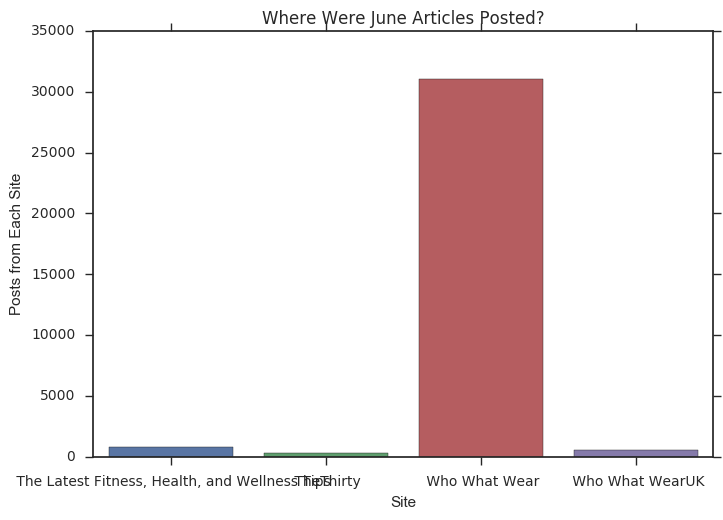

In [652]:
#Here is an updated graph to demonstrate the different site categories
sns.set(style="ticks", color_codes=True)
sns.barplot(x='Site', y='count', data=site);
plt.title('Where Were June Articles Posted?')
plt.ylabel('Posts from Each Site')
plt.show()
#Majority of our data comes from Who What Wear posts, we already knew that, but at least our data is more accurate

### __Age Exploration__

In [653]:
data_file['age'] = data_file['age'].astype('category')
age = pd.crosstab(index=data_file['age'],columns="count") 
age = age.reset_index()

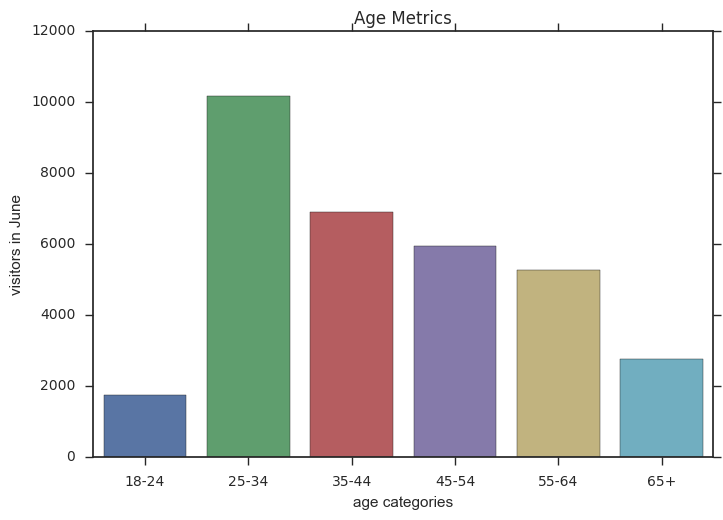

In [654]:
sns.set(style="ticks", color_codes=True)
sns.barplot(x='age', y='count', data=age);
plt.title('Age Metrics')
plt.xlabel('age categories')
plt.ylabel('visitors in June')
plt.show()
#we can see that the highest age group is 25-34, with the smallest being the 18-24 group

### __Audience Gender__

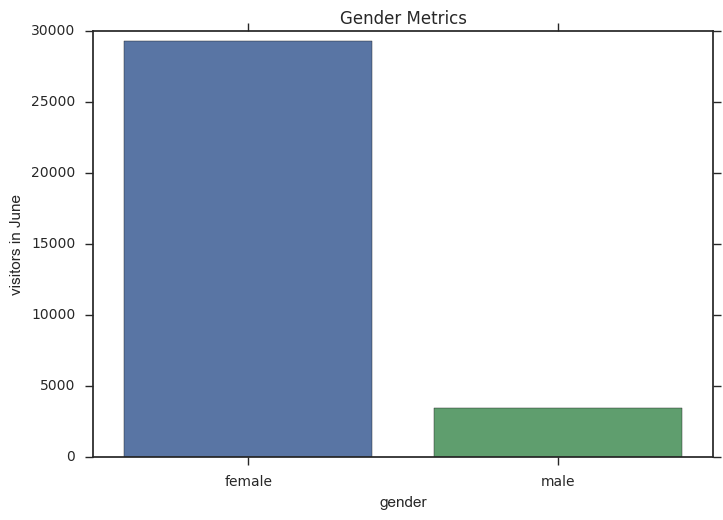

In [655]:
data_file['gender'] = data_file['gender'].astype('category')
gender = pd.crosstab(index=data_file['gender'],columns="count") 
gender = gender.reset_index()
sns.set(style="ticks", color_codes=True)
sns.barplot(x='gender', y='count', data=gender);
plt.title('Gender Metrics')
plt.ylabel('visitors in June')
plt.show()
#female visitors far outweight their male counterparts

### __Source Exploration__

In [656]:
source = pd.crosstab(index=data_file['Source / Medium'],columns="count") 
source = source.reset_index()
source_sort = source.sort_values(by=['count'], ascending=False)
#source_sort.head()
#we can see our top 5 sources are google, facebook, flipboard, and the direct newsletter

In [657]:
data_file['Source / Medium'] = data_file['Source / Medium'].astype('category')
#data_file['Source / Medium'].cat.categories

#seems like a lot of our entires are designated by a source, a "/", and a medium
#let's split these

In [658]:
#splitting the "source" and "medium" columns
new2 = data_file['Source / Medium'].str.split(" / ", n = 1, expand = True) 
new2.head()
data_file['Source'] = new2[0]
data_file['Medium'] = new2 [1]
data_file = data_file[['date','new_date', 'Page_Title', 'Site', 'age', 'gender', 
                       'Source', 'Medium' , 'pageviews', 'Unique Pageviews']]
data_file.head()

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
0,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,35541,31670
1,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,29730,26236
2,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,21249,18923
3,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,45-54,female,m.facebook.com,referral,18858,16825
4,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,18157,15970


In [660]:
#investigate the source and medium separately
data_file['Source'].describe()
data_file['Source'] = data_file['Source'].astype('category')
source_list = data_file.Source.cat.categories.tolist()
data_file['Medium'].describe()
data_file['Medium'] = data_file['Medium'].astype('category')
medium_list = data_file.Medium.cat.categories.tolist()
source_list
#medium_list
#medium = pd.crosstab(index=data_file['Medium'],columns="count") 
#medium = medium.reset_index()
#medium_sort = medium.sort_values(by=['count'], ascending=False)
medium_sort.head()

col_0,Medium,count
13,referral,16378
11,organic,6560
14,social,3632
6,email,2441
0,(none),1849


In [578]:
#now that our database appears ready for analysis, we can start looking at subsets of the data
google = data_file[data_file.Source == 'google']
google.head()

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
141,20190604,2019-06-04,5 Summer Dress Trends That Will Be Everywhere This Season,Who What Wear,25-34,female,google,organic,5814,4881
152,20190617,2019-06-17,"The 16 Top Fashion Brands, According to Editors",Who What Wear,25-34,female,google,organic,5615,4597
200,20190628,2019-06-28,The 23 Best Shopping Picks for June 2019,Who What Wear,25-34,female,google,organic,4995,3924
237,20190624,2019-06-24,7 Outdated Sandal Trends We're Splitting Up With,Who What Wear,55-64,female,google,organic,4660,4160
240,20190621,2019-06-21,9 Summer Outfits Our Editors Wore to the Office This Month,Who What Wear,25-34,female,google,organic,4636,3779


In [590]:
referral = data_file[data_file.Medium == 'referral']
referral.head()

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
0,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,35541,31670
1,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,29730,26236
2,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,21249,18923
3,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,45-54,female,m.facebook.com,referral,18858,16825
4,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,18157,15970


In [592]:
male = data_file[data_file.gender == 'male']
male.head()
female = data_file[data_file.gender == 'female']
female.head()

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
0,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,35541,31670
1,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,29730,26236
2,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,35-44,female,m.facebook.com,referral,21249,18923
3,20190606,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,45-54,female,m.facebook.com,referral,18858,16825
4,20190608,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,18157,15970


In [699]:
age = data_file[data_file.age == '25-34']
age.head()
age2 = data_file[data_file.age == '35-44']
age2.describe()
age3 = data_file[data_file.age == '18-24']
age3.describe()

,date,pageviews,Unique Pageviews
count,1.740000e+03,1740.000000,1740.000000
mean,2.019062e+07,263.436207,213.547701
std,8.767048e+00,395.634307,333.429927
min,2.019060e+07,10.000000,10.000000
25%,2.019061e+07,54.000000,45.000000
50%,2.019062e+07,162.000000,130.000000
75%,2.019062e+07,316.000000,250.000000
max,2.019063e+07,5715.000000,4780.000000


In [661]:
topsite = data_file[data_file.Site == ' Who What Wear']
topsite.head()
#UK = data_file[data_file.Site == ' Who What WearUK']
#UK.head()

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
75,20190613,2019-06-13,The Best Ways to Apply Blush for Every Face Shape,Who What WearUK,35-44,female,m.facebook.com,referral,7716,6679
115,20190613,2019-06-13,The Best Ways to Apply Blush for Every Face Shape,Who What WearUK,45-54,female,m.facebook.com,referral,6282,5394
249,20190613,2019-06-13,The Best Ways to Apply Blush for Every Face Shape,Who What WearUK,55-64,female,m.facebook.com,referral,4556,3908
314,20190613,2019-06-13,The Best Ways to Apply Blush for Every Face Shape,Who What WearUK,25-34,female,m.facebook.com,referral,4141,3573
672,20190602,2019-06-02,Jennifer Aniston Just Nailed Smart Summer Style,Who What WearUK,55-64,female,from.flipboard.com,referral,2578,1929


In [641]:
#pull the some entires based on our word cloud
term = 'Celebrity'
celeb_titles = [i for i in data_file.Page_Title if terms in i] 
celeb_titles[0:5]
#can add to list later on

['3 Items a Celebrity Stylist Would Remove From Your Suitcase ',
 'The 11 Best Celebrity Outfits of Summer 2019 ',
 '3 Items a Celebrity Stylist Would Remove From Your Suitcase ',
 'The 11 Best Celebrity Outfits of Summer 2019 ',
 'The 9 Most Daring Celebrity Bikini Trends of 2019 ']

In [670]:
JuneTwentyFour = data_file[data_file.new_date == '2019-06-24']
JuneSix = data_file[data_file.new_date == '2019-06-06']
JuneTwentyEight = data_file[data_file.new_date == '2019-06-28']
JuneTwentyEight.describe()
#data_file.new_date.describe()

,date,pageviews,Unique Pageviews
count,1291.0,1291.000000,1291.000000
mean,20190628.0,358.471727,293.086754
std,0.0,659.324892,545.480261
min,20190628.0,10.000000,10.000000
25%,20190628.0,72.000000,57.000000
50%,20190628.0,166.000000,135.000000
75%,20190628.0,344.500000,286.000000
max,20190628.0,6402.000000,5267.000000


### <a name="bus"></a> III. BUSINESS INTERESTS
---
__ use this section to do some stats analysis__

- WHO IS OUR AUDIENCE?
	
- WHAT DEMOGRAPHIC SEGMENT?

- WHAT CONTENT RESONATES WITH THEM?

- WHAT ARE THE ARTICLE THEMES AND FRAMES THAT ARE DRIVING SITE ENGAGEMENT AND PERFORMANCE?

- WHAT ARE THE CHANNELS THAT ARE DRIVING ENGAGEMENT? 

- WHICH TRAFFIC SOURCES SHOULD WE LEAN INTO, WHICH TRAFFIC SOURCES SHOULD WE MOVE AWAY FROM?

- BULLET SUMMARY

__Did the date of posting have a statistical significance on the pageviews or unique pageviews?__

In [703]:
#thou_samps = data_file.sample(n=1000, random_state=9999)
thou_samps_JuneTwentyFour = JuneTwentyFour.sample(n=1000, random_state=9999)
thou_samps_JuneSix = JuneSix.sample(n=1000, random_state=9999)
thou_samps_JuneSix = thou_samps_JuneSix[['pageviews', 'Unique Pageviews']]
thou_samps_JuneSix.describe()
#I've chosen to sample these two days because they both had ~1300 entries so I could pull a sizeable sample

,pageviews,Unique Pageviews
count,1000.000000,1000.000000
mean,445.020000,376.219000
std,1764.797615,1555.475049
min,10.000000,10.000000
25%,57.750000,47.000000
50%,151.000000,118.000000
75%,354.250000,289.250000
max,35541.000000,31670.000000


In [704]:
thou_samps_JuneTwentyFour = thou_samps_JuneTwentyFour[['pageviews', 'Unique Pageviews']]
#thou_samps_JuneTwentyFour.info()
thou_samps_JuneTwentyFour.describe()

,pageviews,Unique Pageviews
count,1000.000000,1000.000000
mean,393.013000,317.930000
std,755.245737,620.374654
min,10.000000,9.000000
25%,77.000000,60.000000
50%,184.000000,143.500000
75%,384.000000,310.000000
max,9286.000000,7424.000000


H0: thou_samps_JuneTwentyFour = thou_samps_JuneSix

H1: thou_samps_JuneTwentyFour =/= thou_samps_JuneSix

In [718]:
from scipy import stats
date_stats=stats.ttest_rel(thou_samps_JuneSix,thou_samps_JuneTwentyFour)
date_stats

Ttest_relResult(statistic=array([ 0.85739274,  1.10175326]), pvalue=array([ 0.3914335 ,  0.27083433]))

__ Because PVAL > 0.05, we fail to reject the H0 that the samples are statistically different, suggesting that our differences are instead a result of random chance__

---

__Based on the dataset, it seems that our audience consists of mainly females, aged 24-35, in the US, but is this just a coincidence? Let's run some tests and see what our results say __

In [716]:
#male.info()
#female.info()
thou_samps_male = male.sample(n=1000, random_state=9999)
thou_samps_female = female.sample(n=1000, random_state=9999)
thou_samps_male = thou_samps_male[['pageviews', 'Unique Pageviews']]
thou_samps_male.describe()
thou_samps_female = thou_samps_female[['pageviews', 'Unique Pageviews']]
thou_samps_female.describe()

,pageviews,Unique Pageviews
count,1000.000000,1000.000000
mean,403.501000,334.481000
std,764.099404,649.303251
min,10.000000,9.000000
25%,61.750000,50.000000
50%,183.500000,151.000000
75%,405.250000,335.000000
max,8718.000000,7466.000000


H0: thou_samps_male = thou_samps_female

H1: thou_samps_male =/= thou_samps_female

In [720]:
gender_stats = stats.ttest_rel(thou_samps_female,thou_samps_male)
gender_stats

Ttest_relResult(statistic=array([ 8.49477055,  8.62400515]), pvalue=array([  7.12031839e-17,   2.50599408e-17]))

__ Because PVAL < 0.05, we reject the null hypothesis and find that there is statistical evidence that there is a difference between the pageviews and sessions of Males and Females, giving credibility to our theory about our audience and demographics __

In [724]:
#age this is a segment of site visitors that are 25-34
#age2 this is a segment of site visitors that are 35-44
#age3 this is a segment of site visitors that are 18-24

thou_samps_age = age.sample(n=1000, random_state=9999)
thou_samps_age3 = age3.sample(n=1000, random_state=9999)
thou_samps_age = thou_samps_age[['pageviews', 'Unique Pageviews']]
thou_samps_age.describe()
thou_samps_age3 = thou_samps_age3[['pageviews', 'Unique Pageviews']]
thou_samps_age3.describe()

,pageviews,Unique Pageviews
count,1000.000000,1000.00000
mean,274.024000,222.32000
std,383.326431,322.74467
min,10.000000,10.00000
25%,58.000000,48.75000
50%,174.000000,138.00000
75%,329.250000,262.00000
max,3977.000000,3394.00000


H0: thou_samps_age = thou_samps_age3

H1: thou_samps_age =/= thou_samps_age3

In [726]:
age_stats = stats.ttest_rel(thou_samps_age,thou_samps_age3)
age_stats

Ttest_relResult(statistic=array([ 5.45961694,  5.43497152]), pvalue=array([  6.02072836e-08,   6.88756299e-08]))

__ Because PVAL < 0.05, we reject the null hypothesis and find that there is statistical evidence that there is a difference between the pageviews and sessions of 18-24 yr olds and 25-34 yr olds, giving credibility to our theory about our audience and demographics __

In [728]:
#topsite.info() 
#this is a segment of articles from WHO WHAT WEAR
#UK.info() 
#this is a segment of articles from WHO WHAT WEAR UK, 
#we only have ~600 entries here, so we will use a smaller sample size

thou_samps_topsite = topsite.sample(n=500, random_state=9999)
thou_samps_UK = UK.sample(n=500, random_state=9999)
thou_samps_topsite = thou_samps_topsite[['pageviews', 'Unique Pageviews']]
thou_samps_topsite.describe()
thou_samps_UK = thou_samps_UK[['pageviews', 'Unique Pageviews']]
thou_samps_UK.describe()

,pageviews,Unique Pageviews
count,500.000000,500.000000
mean,320.942000,268.334000
std,566.769192,482.432188
min,10.000000,10.000000
25%,68.750000,59.750000
50%,194.500000,163.000000
75%,385.750000,321.000000
max,7716.000000,6679.000000


H0: thou_samps_topsite = thou_samps_UK

H1: thou_samps_topsite =/= thou_samps_UK

In [729]:
site_stats = stats.ttest_rel(thou_samps_topsite,thou_samps_UK)
site_stats

Ttest_relResult(statistic=array([ 1.90133849,  1.75080972]), pvalue=array([ 0.05783345,  0.08059317]))

__Our results here seem very close. PVAL is right around the significance value. 
I would say these results are inconclusive for the time being. __

Additional steps would be to 
- increase the sample size (maybe use more than one month of data?)
- Possibly raise our critical value to be more exact

__How does the content resonate? I assume that this is indicated by high pageviews, let's take a look...__

In [767]:
#data_file.pageviews.describe()
#Looking at the breakdown of pageviews, our top 25% is between 369.0 - 35541.0
#Our bottom 25% is between 9 - 61
#Let's pull a subset of each and look at the articles included in each.

top_page = data_file[data_file.pageviews >= 369.0]
top_page.info()

bottom_page = data_file[data_file.pageviews <= 61.0]
bottom_page.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 0 to 8198
Data columns (total 10 columns):
date                8199 non-null int64
new_date            8199 non-null datetime64[ns]
Page_Title          8199 non-null object
Site                8199 non-null category
age                 8199 non-null category
gender              8199 non-null category
Source              8199 non-null category
Medium              8199 non-null category
pageviews           8199 non-null int64
Unique Pageviews    8199 non-null int64
dtypes: category(5), datetime64[ns](1), int64(3), object(1)
memory usage: 425.1+ KB


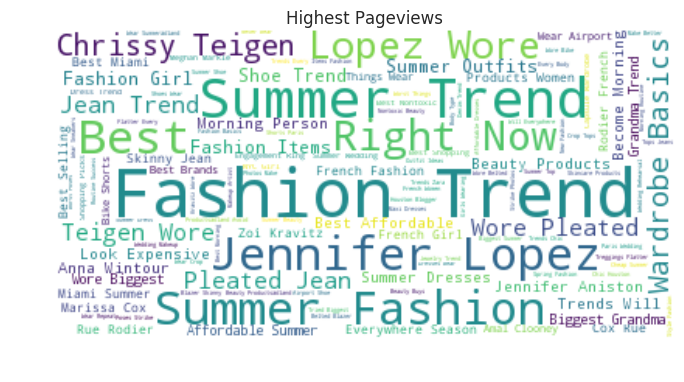

In [764]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in top_page.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Highest Pageviews")
plt.show()

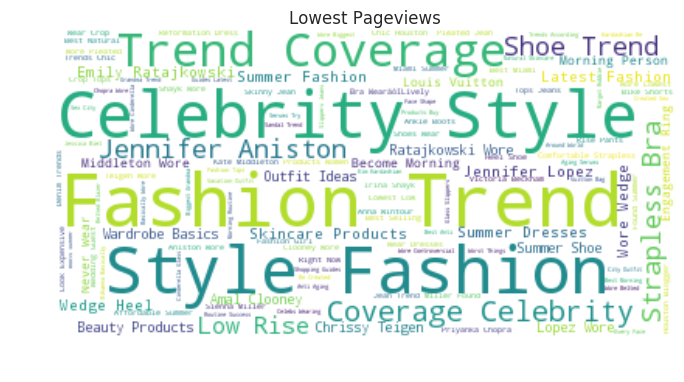

In [762]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in bottom_page.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Lowest Pageviews")
plt.show()

Interesting results, it seems like even though we saw that "Celebrity" was the most used word in posts earlier, articles with that word did not get the most page views and it in fact, only exists in the word cloud with the lowest pageviews. We can see that in the popular pageviews, there are names of celebrities, like Jennifer Lopez, Chrissy Teigan, Teigan Wore, etc. So while the word "Celebrity", doesn't seem to get pageviews, the actual specific names seem to get better results. We also see popularity with the word "summer" which makes sense since this data is from June. Additionally, we should note that "Fashion Trend" appears frequently in both the top pageviews and the bottom pageviews.

__Article themes that drive engagement and performance?  I assume that this is indicated by high sessions (unique pageviews), let's take a look...__

In [784]:
#data_file.info()
#rename column because the space in the name is making it mad
data_file = data_file.rename(columns={"Unique Pageviews": "Unique_page"})

#Looking at the breakdown of Unique Pageviews, our top 25% is between 303.0 - 31670.0
#Our bottom 25% is between 7 - 50
#Let's pull a subset of each and look at the articles included in each.

top_unq = data_file[data_file.Unique_page >= 303.0]
top_unq.info()

bottom_unq = data_file[data_file.Unique_page <= 50.0]
bottom_unq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 9953
Data columns (total 10 columns):
date           8191 non-null int64
new_date       8191 non-null datetime64[ns]
Page_Title     8191 non-null object
Site           8191 non-null category
age            8191 non-null category
gender         8191 non-null category
Source         8191 non-null category
Medium         8191 non-null category
pageviews      8191 non-null int64
Unique_page    8191 non-null int64
dtypes: category(5), datetime64[ns](1), int64(3), object(1)
memory usage: 424.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8258 entries, 19419 to 32754
Data columns (total 10 columns):
date           8258 non-null int64
new_date       8258 non-null datetime64[ns]
Page_Title     8258 non-null object
Site           8258 non-null category
age            8258 non-null category
gender         8258 non-null category
Source         8258 non-null category
Medium         8258 non-null category
pageviews      82

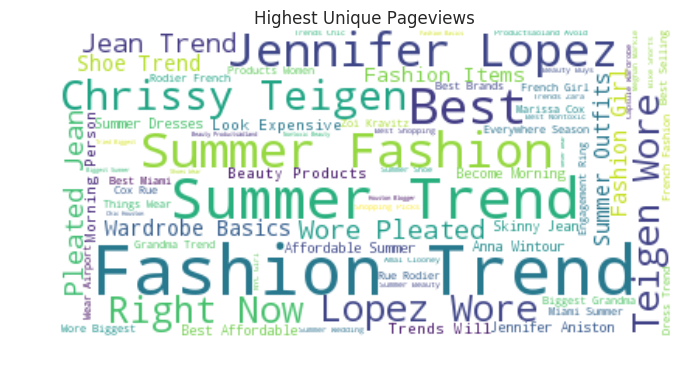

In [785]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in top_unq.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Highest Unique Pageviews")
plt.show()

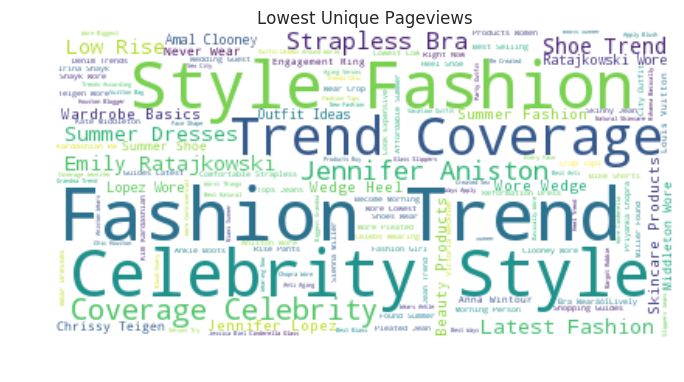

In [786]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in bottom_unq.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Lowest Unique Pageviews")
plt.show()

As with the Top Pageviews, we are seeing a higher frequency of words like "summer" and specific celebrity names. Additionally, we see that "celebrity" is listed multiple times in the low unique pageview wordcloud, and doesn't exist in the top unique pageciew wordcloud. This is a good indicator to me that article titles should try to have specific celebrity names in the titles and doing so will be more engaging to customers. 
Again we see that "Fashion Trend" is listed in both the highest and the lowest Unique Pageview wordclouds. 

__Where are our main traffic sources coming from? Let's look at the source for our top pageviews and unique pageviews__

In [790]:
top_page.describe(include='all')
top_unq.describe(include='all')

#Our data shows that for the top pageviews and unique pageviews, our source is Facebook mobile.

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique Pageviews
count,8.199000e+03,8199,8199,8199,8199,8199,8199,8199,8199.000000,8199.000000
unique,NaN,30,651,4,6,2,38,11,NaN,NaN
top,NaN,2019-06-24 00:00:00,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,NaN,NaN
freq,NaN,357,146,7842,2859,7939,2379,5210,NaN,NaN
first,NaN,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.019062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1141.871570,945.880595
std,8.913794e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1497.872842,1277.085650
min,2.019060e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369.000000,135.000000
25%,2.019061e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.000000,390.000000


In [794]:
top_page['Source'] = top_page['Source'].astype('category')
page_source = pd.crosstab(index=top_page['Source'],columns="count") 
page_source = page_source.reset_index()
page_source_sort = page_source.sort_values(by=['count'], ascending=False)
page_source_sort.head()
#the results show the top 5 sources for the top pageviews are from 
##Mobile Facebook, newsletter, Google, Flipboard, and WhoWhatWear.com

col_0,Source,count
32,m.facebook.com,2379
40,newsletter,1254
20,google,1131
18,from.flipboard.com,805
65,www-whowhatwear-com.cdn.ampproject.org,654


__Channels driving engagment? Let's look at the medium information and see how our customers are getting to our articles. __

In [797]:
top_page.describe(include='all')
top_unq.describe(include='all')

#Our data shows that for the top pageviews and unique pageviews, our source is referral.

,date,new_date,Page_Title,Site,age,gender,Source,Medium,pageviews,Unique_page
count,8.191000e+03,8191,8191,8191,8191,8191,8191,8191,8191.000000,8191.000000
unique,NaN,30,651,4,6,2,38,11,NaN,NaN
top,NaN,2019-06-02 00:00:00,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,25-34,female,m.facebook.com,referral,NaN,NaN
freq,NaN,355,154,7819,2828,7929,2475,5239,NaN,NaN
first,NaN,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.019062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1141.111708,947.848614
std,8.927721e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499.182890,1276.865650
min,2.019060e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.000000,303.000000
25%,2.019061e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.000000,391.000000


In [798]:
top_page['Medium'] = top_page['Medium'].astype('category')
page_med = pd.crosstab(index=top_page['Medium'],columns="count") 
page_med = page_med.reset_index()
page_med_sort = page_med.sort_values(by=['count'], ascending=False)
page_med_sort.head()
#the results show the top 3 medium for the top pageviews are via 
##"referral" by a long shot, "email", and "organic"
##Not sure what "(none)" refers to in the "medium" category...

col_0,Medium,count
13,referral,5210
6,email,1254
11,organic,1131
0,(none),268
14,social,161




- WHO IS OUR AUDIENCE? WHAT DEMOGRAPHIC SEGMENT?

Our data for the month of June 2019, shows lots of posts from the domestic Who What Wear site that received engagment from females older than 24. Statistically, we have found evidence that our articles are standing out with females and people in the 25-34 age group.

- WHAT CONTENT RESONATES WITH THEM? WHAT ARE THE ARTICLE THEMES AND FRAMES THAT ARE DRIVING SITE ENGAGEMENT AND PERFORMANCE?

We found that content that has trigger words like "Summer", "Trend", and specific celebrity names were frequently in the top pageview and top sessions. Based on the wordclouds, I would recommend using titles that are as specific as possible. General words like "celebrity" consistently showed up in the lowest pageviews and sessions.

- WHAT ARE THE CHANNELS THAT ARE DRIVING ENGAGEMENT? WHICH TRAFFIC SOURCES SHOULD WE LEAN INTO, WHICH TRAFFIC SOURCES SHOULD WE MOVE AWAY FROM?

Our top pageviews and sessions were driven by mobile facebook referral and seem to be for a specific article about "Chrissy Teigan Wore the Pleated Jean Trend", confirming the theory that more specific articles are more engaging. 


### <a name="con"></a> IV. CONCLUSIONS
---
WHAT DOES IT MEAN IN CONTEXT? <BR>

In June 2019, the articles seems to be attracting female customers older than 24. In terms of content, it seems like the more specific the article the better. Engagement is higher for articles with specific celebrity names (Jennifer Lopez or Chrissy Teigan) and seasons (Summer Trends) versus those with more generalized themes and verbiage. This is interesting to note because the word "celebrity" was one of the most frequent words used in titles from our dataset. While our most popular source in the dataset was "google", the source that had the most engagement was "Facebook Mobile". It would be interesting to compare this months data against other months to see if these themes hold true and constant. 

__bonus! not requested, but color me curious. 
what kind of males are looking at clique brands?
what are they looking at?__

In [803]:
male.info()
male.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 124 to 32753
Data columns (total 10 columns):
date                3445 non-null int64
new_date            3445 non-null datetime64[ns]
Page_Title          3445 non-null object
Site                3445 non-null category
age                 3445 non-null category
gender              3445 non-null category
Source              3445 non-null category
Medium              3445 non-null category
pageviews           3445 non-null int64
Unique Pageviews    3445 non-null int64
dtypes: category(5), datetime64[ns](1), int64(3), object(1)
memory usage: 179.0+ KB


,date,pageviews,Unique Pageviews
count,3.445000e+03,3445.000000,3445.000000
mean,2.019062e+07,160.653120,128.984325
std,8.862308e+00,363.789775,288.561527
min,2.019060e+07,10.000000,10.000000
25%,2.019061e+07,29.000000,25.000000
50%,2.019062e+07,73.000000,60.000000
75%,2.019062e+07,161.000000,130.000000
max,2.019063e+07,6093.000000,4691.000000


In [802]:
#frequent page titles
male_titles = male['Page_Title'].astype('category')
male_titles = pd.crosstab(index=male['Page_Title'],columns="count") 
male_titles = male_titles.reset_index()
male_titles_sort = male_titles.sort_values(by=['count'], ascending=False)
male_titles_sort.head()

col_0,Page_Title,count
153,Celebrity Style and Fashion Trend Coverage,135
348,"These $69 Treggings ""Flatter Every Body Type""",133
155,Chrissy Teigen Wore the Pleated-Jean Trend,117
172,How to Become a Morning Person,91
310,The Best Miami Summer Trends for Under $100,74


In [804]:
#
top_page2 = male[male.pageviews >= 130.0]
top_page2.info()

bottom_page2 = male[male.pageviews <= 25.0]
bottom_page2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 124 to 19043
Data columns (total 10 columns):
date                1093 non-null int64
new_date            1093 non-null datetime64[ns]
Page_Title          1093 non-null object
Site                1093 non-null category
age                 1093 non-null category
gender              1093 non-null category
Source              1093 non-null category
Medium              1093 non-null category
pageviews           1093 non-null int64
Unique Pageviews    1093 non-null int64
dtypes: category(5), datetime64[ns](1), int64(3), object(1)
memory usage: 57.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 29269 to 32753
Data columns (total 10 columns):
date                761 non-null int64
new_date            761 non-null datetime64[ns]
Page_Title          761 non-null object
Site                761 non-null category
age                 761 non-null category
gender              761 non-null category
Source            

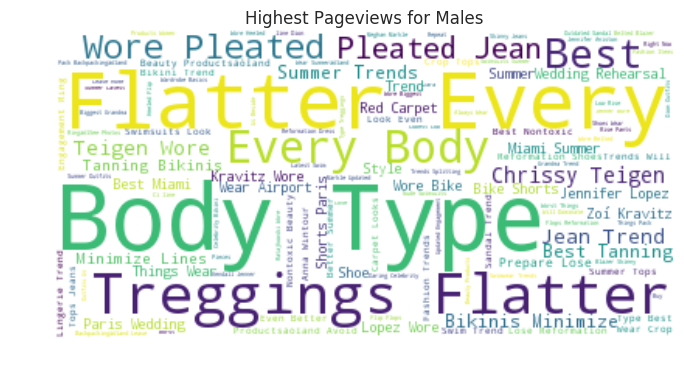

In [805]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in top_page2.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Highest Pageviews for Males")
plt.show()

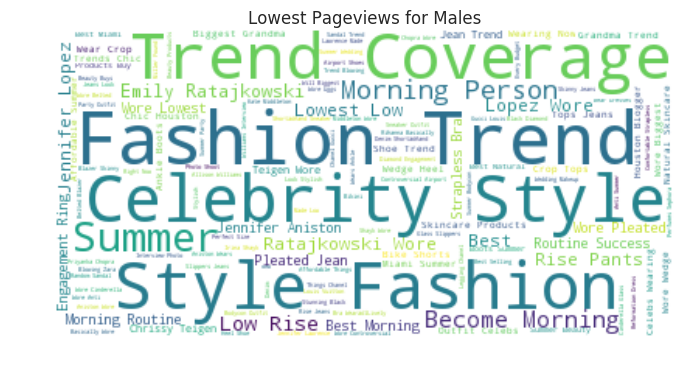

In [806]:
#wordcloud library seems faulty, need to load in at each run
from wordcloud import wordcloud
text = " ".join(review for review in bottom_page2.Page_Title)
wordcloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Lowest Pageviews for Males")
plt.show()

Lol seems like there is some male interest in Flattering Every Body Type and Treggings (what are those?)